In [2]:
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [15]:
df = pd.read_csv("titanic_train.csv")
df.shape

(891, 12)

In [5]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [7]:
report = ProfileReport(df, title='Titanic Train')
report.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
report.to_notebook_iframe()

Text(0.5, 1.0, 'correlation Plot')

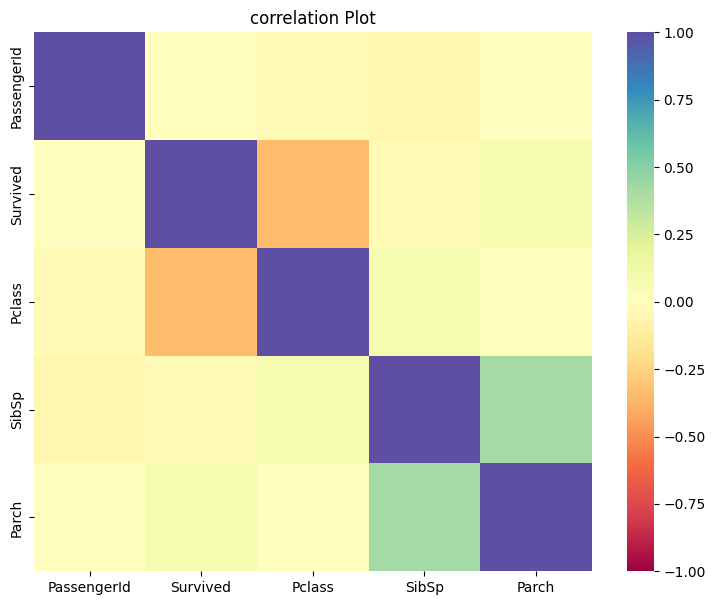

In [12]:
df3 = df.select_dtypes('int64', 'float64')
plt.figure(figsize=(9,7))
sns.heatmap(df3.corr(), vmin=-1, vmax=1, cmap='Spectral').set_title("correlation Plot")

In [22]:
df4 = df[['Survived', 'Sex', 'Age', 'Pclass']]
df4 = pd.get_dummies(df4)
df4.corr()
sns.heatmap(df4.corr(), vmin=-1, vmax=1, cmap='Spectral').set_title("correlation Plot")


Text(0.5, 1.0, 'correlation Plot')

In [18]:
df1 = df[['Age', 'Sex', 'Survived']]

Another way to make a new data frame below

In [31]:
features = ['Fare', 'Age', 'Sex', 'Survived']
df1 = df[features]

<Axes: xlabel='Age', ylabel='Survived'>

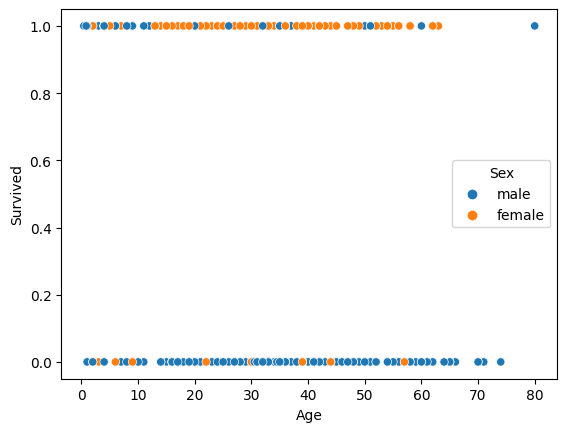

In [35]:
sns.scatterplot(x='Age', y='Survived', data=df1, hue='Sex')



C:\Users\dzaus\AppData\Local\Temp\ipykernel_16784\3273492912.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, hue='Sex', ci=None)


<Axes: xlabel='Pclass', ylabel='Survived'>

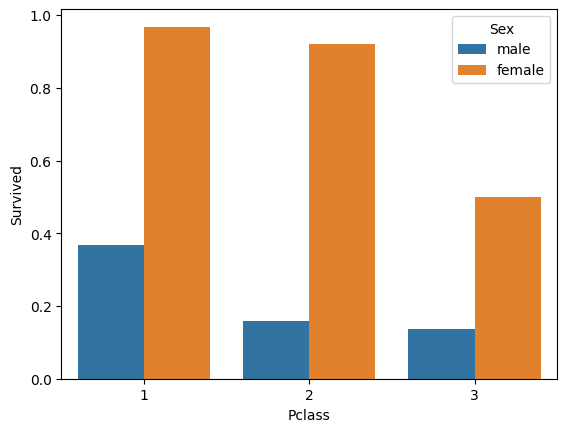

In [65]:
sns.barplot(x='Pclass', y='Survived', data=df, hue='Sex', ci=None)

In [40]:
women = df.loc[df.Sex == 'female']["Survived"]
rate_women = round((sum(women)/len(women)) * 100, 2)
print(f"% of women who sruvived: {rate_women}")

% of women who sruvived: 74.2


In [42]:
men = df.loc[df.Sex == 'male']["Survived"]
rate_men = round((sum(men)/len(men)) * 100, 2)
print(f"% of women who sruvived: {rate_men}")

% of women who sruvived: 18.89


In [44]:
from sklearn.ensemble import RandomForestClassifier
test_data = pd.read_csv('titanic_test.csv')

In [49]:
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [46]:
y = df["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df[features])
X_test = pd.get_dummies(test_data[features])

In [47]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)



In [66]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions, 'Sex': test_data.Sex, 'Pclass': test_data.Pclass})
print(output)
output.to_csv("model_output_test.csv")

     PassengerId  Survived     Sex  Pclass
0            892         0    male       3
1            893         1  female       3
2            894         0    male       2
3            895         0    male       3
4            896         1  female       3
..           ...       ...     ...     ...
413         1305         0    male       3
414         1306         1  female       1
415         1307         0    male       3
416         1308         0    male       3
417         1309         0    male       3

[418 rows x 4 columns]


In [61]:
women = output.loc[output.Sex == 'female']["Survived"]
rate_women = round((sum(women)/len(women)) * 100, 2)
print(f"% of women who sruvived: {rate_women}")

% of women who sruvived: 94.74


In [62]:
men = output.loc[output.Sex == 'male']["Survived"]
rate_men = round((sum(men)/len(men)) * 100, 2)
print(f"% of women who sruvived: {rate_men}")

% of women who sruvived: 1.5


C:\Users\dzaus\AppData\Local\Temp\ipykernel_16784\3645078328.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=output, hue='Sex', ci=None)


<Axes: xlabel='Pclass', ylabel='Survived'>

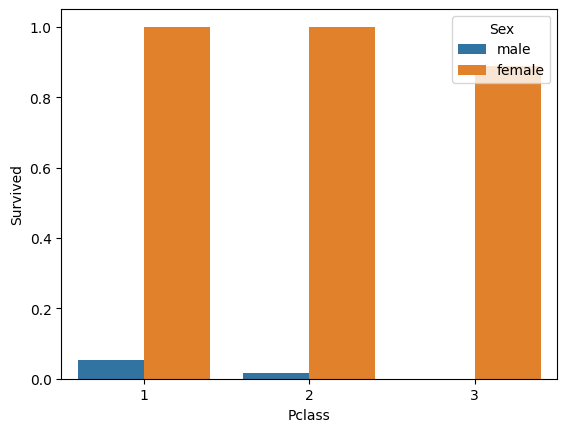

In [67]:
sns.barplot(x='Pclass', y='Survived', data=output, hue='Sex', ci=None)